In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multitest as multi
import re
import dataframe_image as dfi
from statannotations.Annotator import Annotator
from Bio import SeqIO

sys.path.append('/home/felix/jupyter/jupyter_notebooks/functions')

In [3]:
import alphafold2_multimer_screen as af2h

In [4]:
pinf = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/GCF_000142945.1_ASM14294v1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
pto = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/Pseudomonas_syringae_pv_tomato_DC3000_111_ids_noX_secretion.tsv', sep='\t', index_col=0)
cful = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/GCA_020509005.1_Cfulv_R5_v4_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
bcin = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/GCF_000143535.2_ASM14353v4_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
foxy = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/GCF_000271745.1_FO_FOSC_3_a_V1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
rsol = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/GCF_001587155.1_ASM158715v1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
xper = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/GCF_013112235.1_ASM1311223v1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
fol = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/GCF_000149955.1_ASM14995v2_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)
rsol_gmi = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/secretion_prediction/GCF_000009125.1_ASM912v1_protein_ids_noX_secretion.tsv', sep='\t', index_col=0)

In [5]:
pinf_sec, pinf_apop = af2h.small_secreted_candidates(pinf)
pto_sec, pto_apop = af2h.small_secreted_candidates(pto)
cful_sec, cful_apop = af2h.small_secreted_candidates(cful)
bcin_sec, bcin_apop = af2h.small_secreted_candidates(bcin)
foxy_sec, foxy_apop = af2h.small_secreted_candidates(foxy)
rsol_sec, rsol_apop = af2h.small_secreted_candidates(rsol)
xper_sec, xper_apop = af2h.small_secreted_candidates(xper)
fol_sec, fol_apop = af2h.small_secreted_candidates(fol)
rsol_gmi_sec, rsol_gmi_apop = af2h.small_secreted_candidates(rsol_gmi)

In [6]:
fol_extra = []

record_dict = SeqIO.to_dict(SeqIO.parse("/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/fol_extra.fasta", "fasta"))

for i in record_dict:
    fol_extra.append(i)

In [7]:
cfu_extra = []

record_dict = SeqIO.to_dict(SeqIO.parse("/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/cfulvum_extra.fasta", "fasta"))

for i in record_dict:
    cfu_extra.append(i)

In [8]:
names = ["P_infestans", "PtoDC3000", "C_fulvum", "B_cinerea", "F_oxysporum", "F_oxysporum_f_sp_lycopersici", "R_solanacearum", "R_solanacearum_GMI1000", "X_perforans"]
nat = [pinf, pto, cful, bcin, foxy, fol, rsol, rsol_gmi, xper]
sec = [pinf_sec, pto_sec, cful_sec, bcin_sec, foxy_sec, fol_sec, rsol_sec, rsol_gmi_sec, xper_sec]
apo = [pinf_apop, pto_apop, cful_apop, bcin_apop, foxy_apop, fol_apop, rsol_apop, rsol_gmi_apop, xper_apop]

overview = []

for counter, df_path in enumerate(zip(sec, apo, names, nat)):

    overview.append([df_path[2], len(df_path[3]), "Whole_proteome"])
    overview.append([df_path[2], len(df_path[0]), "SignalP_TargetP"])
    overview.append([df_path[2], len(df_path[1]), "SignalP_TargetP_ApoP"])

overview = pd.DataFrame(overview, columns=["Pathogen", "number_of_proteins", "prediction"])

for i in overview.index:
    if overview.loc[i, 'Pathogen'] == 'F_oxysporum_f_sp_lycopersici':
        overview.loc[i, 'number_of_proteins'] = overview.loc[i, 'number_of_proteins'] + len(fol_extra)
        
    elif overview.loc[i, 'Pathogen'] == 'C_fulvum':
        overview.loc[i, 'number_of_proteins'] = overview.loc[i, 'number_of_proteins'] + len(cfu_extra)

In [9]:
final_names = ["P_infestans", "PtoDC3000", "C_fulvum", "B_cinerea", "F_oxysporum_f_sp_lycopersici", "R_solanacearum_GMI1000", "X_perforans"]
final_apo = [pinf_apop, pto_apop, cful_apop, bcin_apop, fol_apop, rsol_gmi_apop, xper_apop]

tot_ids = []

for count, i in enumerate(zip(final_apo, final_names)):
    for ind_id in i[0].index:
        tot_ids.append([ind_id, i[1], ind_id.replace('_', '')])

for i in fol_extra:
    tot_ids.append([i, 'F_oxysporum_f_sp_lycopersici', i])
    
for i in cfu_extra:
    tot_ids.append([i, 'C_fulvum', i])
tot_ids = pd.DataFrame(tot_ids, columns=['prot_id', 'species', 'ids'])

In [10]:
overview = overview[overview.Pathogen != 'F_oxysporum']
overview = overview[overview.Pathogen != 'R_solanacearum']

In [11]:
pathogen_labels={'B_cinerea':'B.cinerea', 'C_fulvum':'C.fulvum', 'F_oxysporum_f_sp_lycopersici':'F.oxysporum f. sp. lyc', 'P_infestans':'P.infestans', 'PtoDC3000':'P.syringae pv. tomato', 'R_solanacearum':'R.solanacearum IBSBF1503', 'R_solanacearum_GMI1000':'R.solanacearum GMI1000', 'X_perforans':'X.perforans'}
species_order = ['P.syringae pv. tomato', 'X.perforans', 'R.solanacearum GMI1000', 'R.solanacearum IBSBF1503', 'B.cinerea', 'C.fulvum', 'P.infestans', 'F.oxysporum f. sp. lyc']

In [12]:
overview.replace({'Pathogen':pathogen_labels}, inplace=True)
tot_ids.replace({'species':pathogen_labels}, inplace=True)

In [13]:
# overview.to_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/seceff_overview.tsv', sep='\t', index=False)
# tot_ids.to_csv('/home/felix/thesis/chapter5_AF2H/figure3_PredSec_screen_and_select_candidates/data/seceff_ids.tsv', sep='\t', index=False)

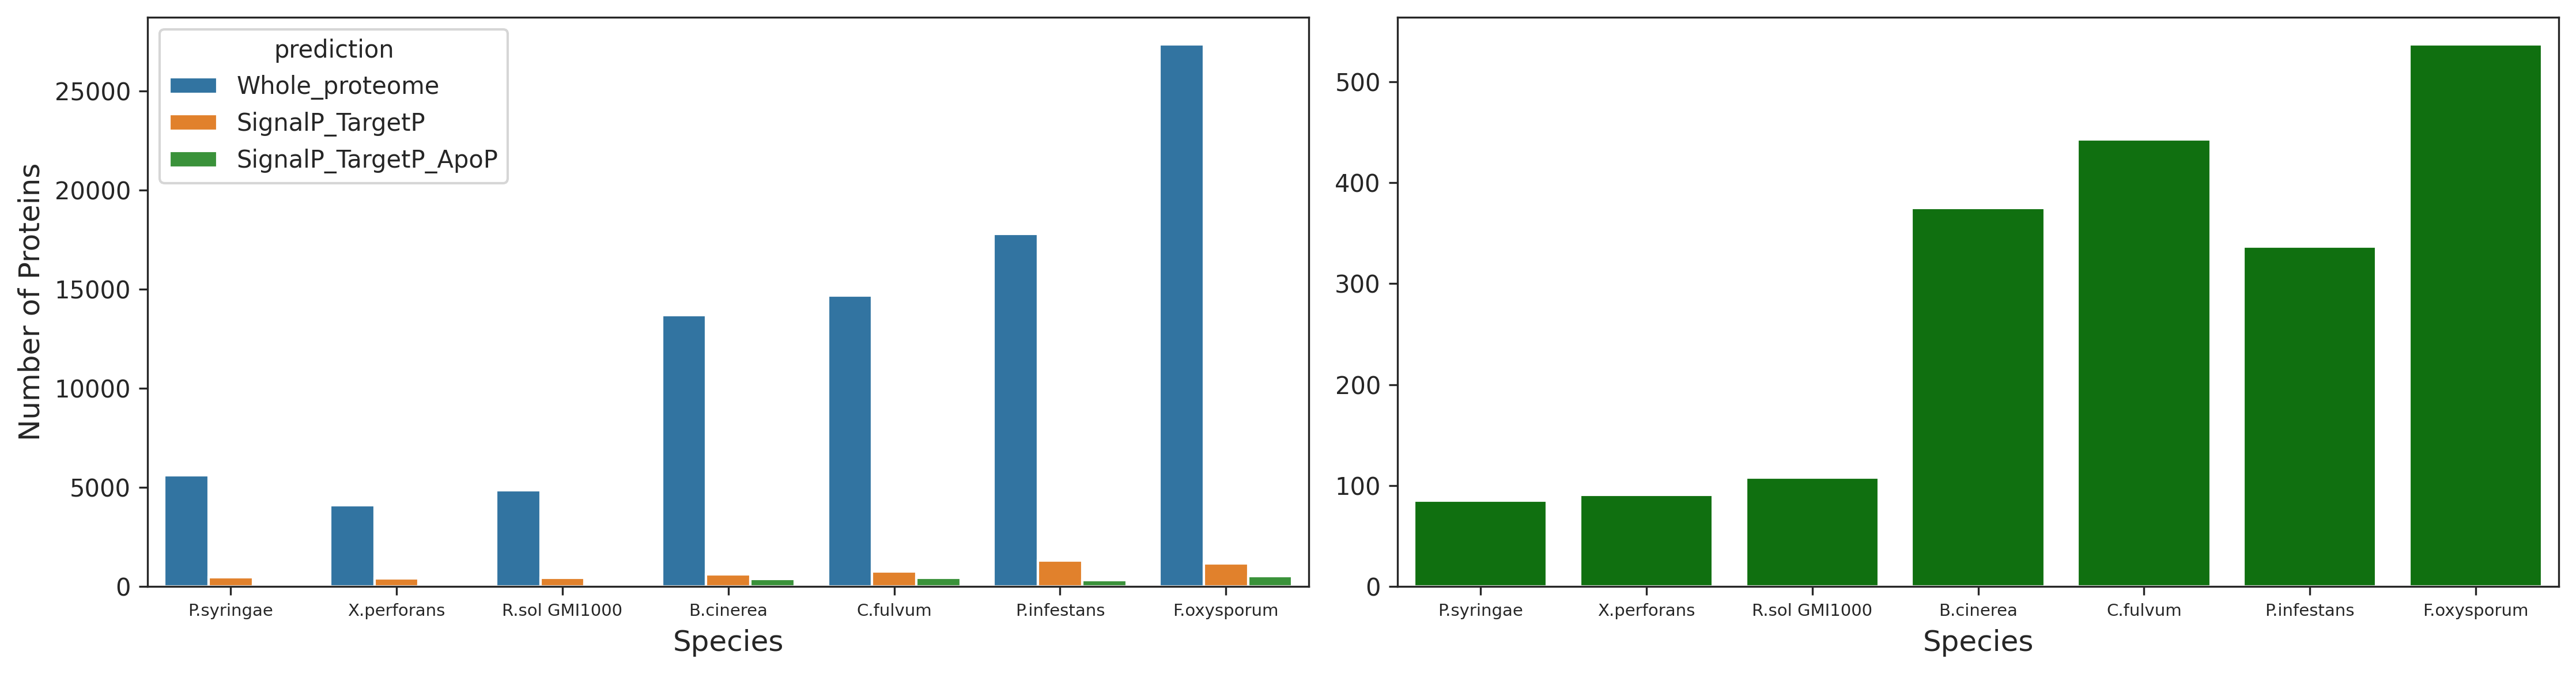

In [14]:
label_order = ['P.syringae', 'X.perforans', 'R.sol GMI1000', 'B.cinerea', 'C.fulvum', 'P.infestans', 'F.oxysporum']
species_order = ['P.syringae pv. tomato', 'X.perforans', 'R.solanacearum GMI1000', 'B.cinerea', 'C.fulvum', 'P.infestans', 'F.oxysporum f. sp. lyc']

fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

sns.barplot(data=overview, x="Pathogen", y="number_of_proteins", order=species_order, hue="prediction", ax=axes[0])
sns.barplot(data=overview[overview.prediction == "SignalP_TargetP_ApoP"], x="Pathogen", y="number_of_proteins", color='green', order=species_order, ax=axes[1]).set(ylabel='')

axes[0].set_xlabel('Species', fontsize=12)
axes[1].set_xlabel('Species', fontsize=12)

axes[0].set_ylabel('Number of Proteins', fontsize=12)

axes[0].set_xticklabels(label_order)
axes[1].set_xticklabels(label_order)

axes[0].tick_params(axis='x', rotation=0, labelsize=7)
axes[1].tick_params(axis='x', rotation=0, labelsize=7)


fig.set_size_inches(15, 4)
plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter5_AF2H/figure2/fig2_PredSec_shindoesque_secretome.svg')
plt.show()

## Filtering for below 200 kDa to capture more from PtoDC3000 

In [15]:
pto_secreted = pto[(pto.signalp_pred != "OTHER") | (pto.targetp_pred == "SP")]
pto_secreted = pto_secreted.rename(columns={'mol_weight[kDa]':'mol_weight_kDa'})
pto_secreted = pto_secreted[pto_secreted.mol_weight_kDa < 200]

In [15]:
#pto_secreted.to_csv('/home/felix/Desktop/coding/alice/ptoDC3000_putSecreted_proteins.tsv', sep='\t')